In [57]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

In [58]:
def get_data(ticker):
    filename = ticker + '.csv'
    data = pd.read_csv(filename)
    return data
    

In [59]:
def t_test(green_stock, stock_market):
    
    length_green = np.shape(green_stock)
    length_green = length_green[0]
    length_stock = np.shape(stock_market)
    length_stock = length_stock[0]   
    
    change = length_stock - length_green

    stock_market = stock_market.drop(stock_market.index[range(0, change)])
    stock_market = stock_market.drop(columns = ['Date', 'High', 'Low', 'Close', 'Volume','Open',])
    #return stock_market
    if 'Date' in green_stock.columns:
        green_stock = green_stock.drop(columns = ['Date', 'High', 'Low', 'Close', 'Volume', 'Open',])
    
    return stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')


In [60]:
def average_all():
    ticker = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]
    NEE = get_data('NEE')
    ECL = get_data('ECL')
    XEL = get_data('XEL')
    EIX = get_data('EIX')
    CMS = get_data('CMS')
    EXC = get_data('EXC')
    ALB = get_data('ALB')
    RSG = get_data('RSG')
    AMRC = get_data('AMRC')
    ENPH = get_data('ENPH')
    TSLA = get_data('TSLA')
    
    
    df = pd.concat([NEE,ECL, XEL, EIX, CMS, EXC, ALB, RSG, AMRC, ENPH, TSLA,]).groupby(level=0).mean()
    return df
        
        

In [61]:
def multiple_t_test(tickers):
    for i in tickers:
        print(i)
        green_stock = get_data(i)
        stock_market = get_data('GSPC')
        t, p = t_test(green_stock, stock_market)
        print('t-value: ', t)
        print('p-value: ', p)
        print()

In [62]:
def get_graph(df):
    df['Close']=df['Close'].astype(float)
    df['High']=df['High'].astype(float)
    df['Low']=df['Low'].astype(float)
    df.plot(kind = 'line', x = 'Date', y = 'Close', color = 'green')
    df.plot(kind = 'line', x = 'Date', y = 'High', color = 'red')
    df.plot(kind = 'line', x = 'Date', y = 'Low', color = 'blue')
    plt.show()

Average of all

NEE
p-value:  [0.]

ECL
p-value:  [0.]

XEL
p-value:  [0.]

EIX
p-value:  [0.]

CMS
p-value:  [0.]

EXC
p-value:  [0.]

ALB
p-value:  [0.]

RSG
p-value:  [0.]

AMRC
p-value:  [0.]

ENPH
p-value:  [0.]

TSLA
p-value:  [0.]

GSPC
p-value:  [1.]

NEE


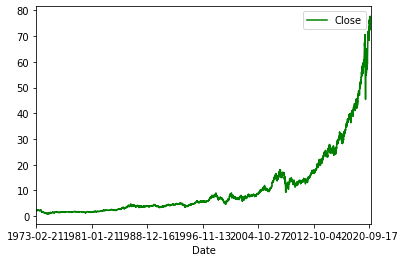

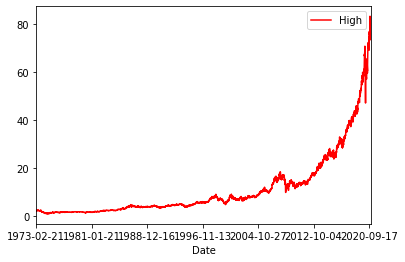

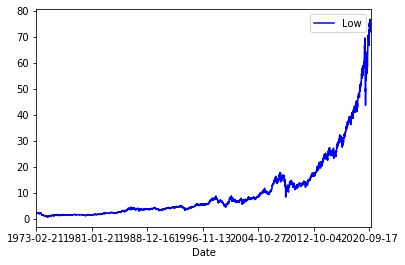

ECL


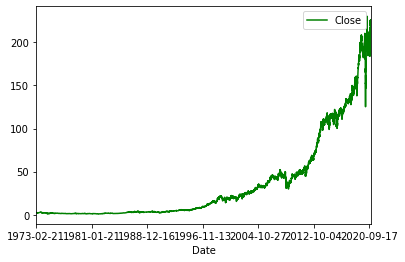

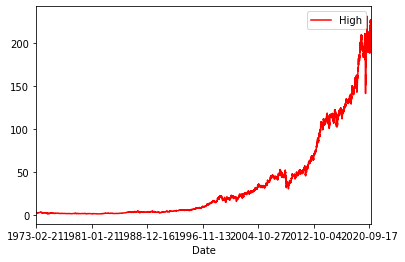

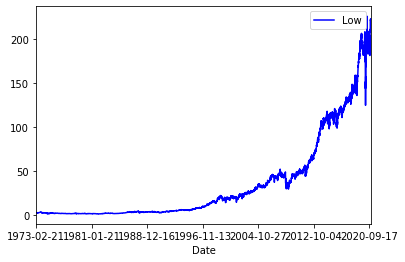

XEL


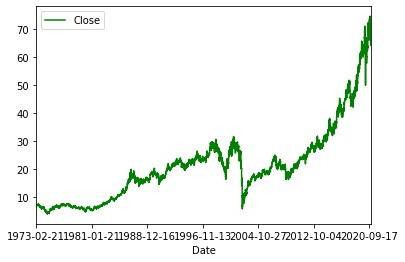

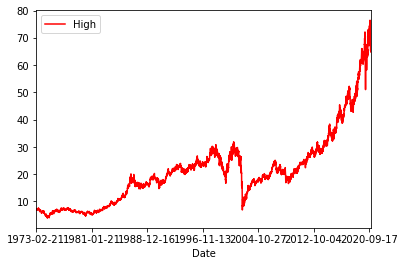

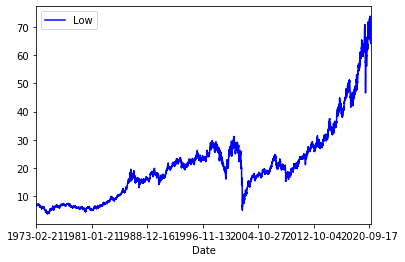

EIX


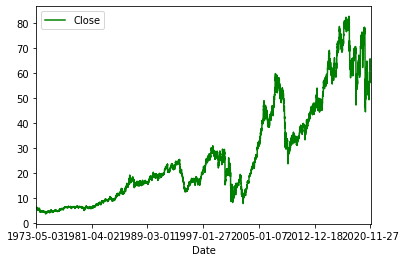

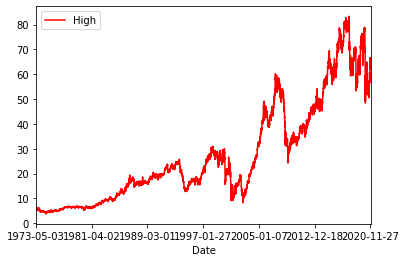

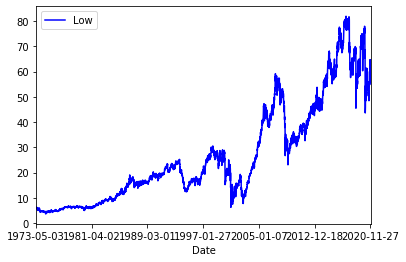

CMS


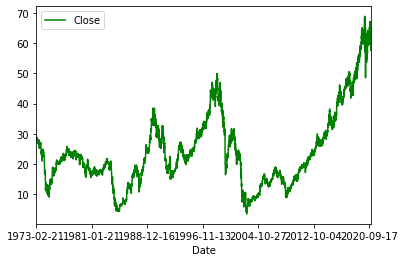

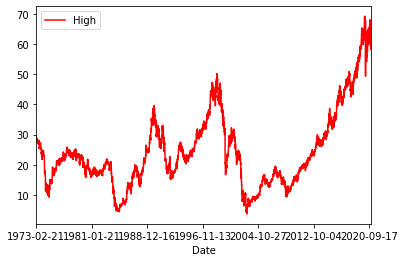

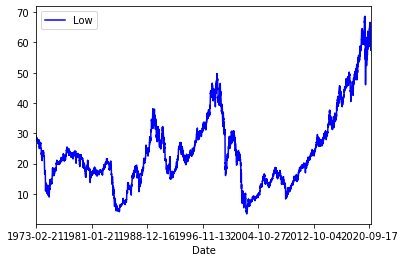

EXC


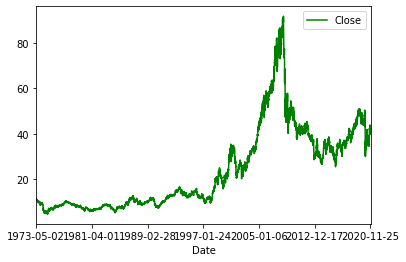

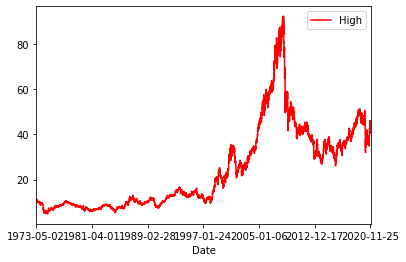

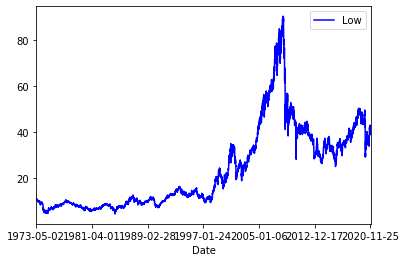

ALB


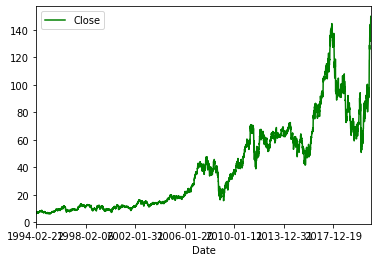

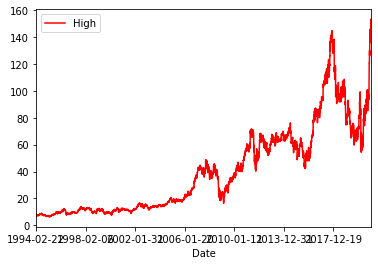

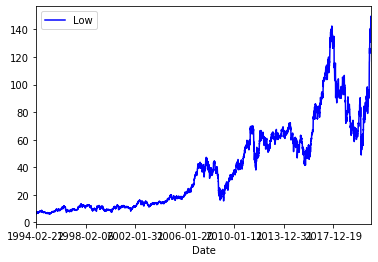

RSG


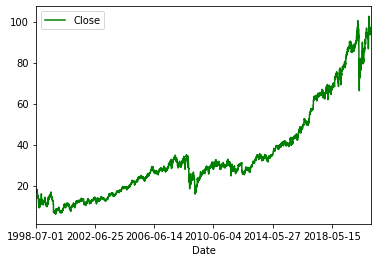

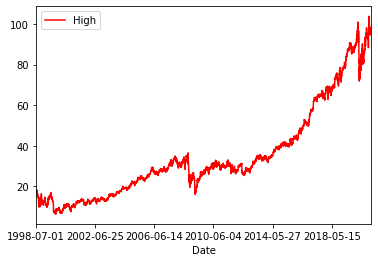

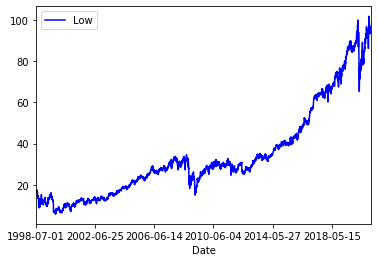

AMRC


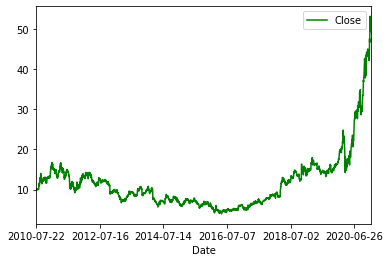

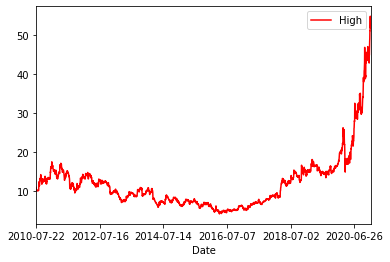

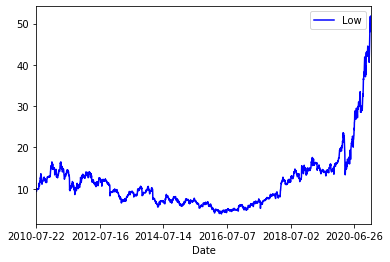

ENPH


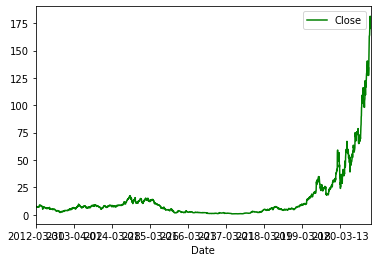

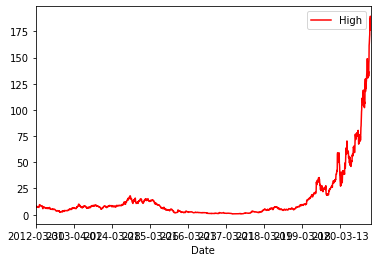

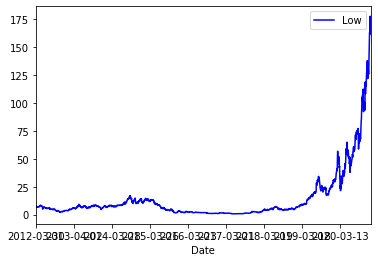

TSLA


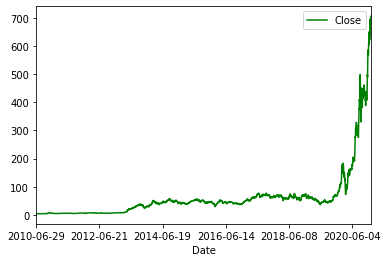

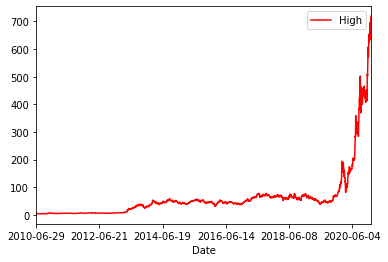

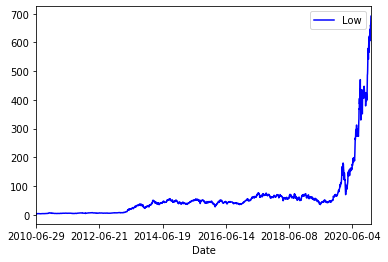

GSPC


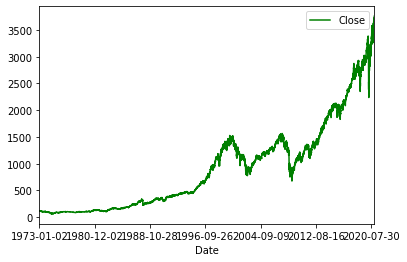

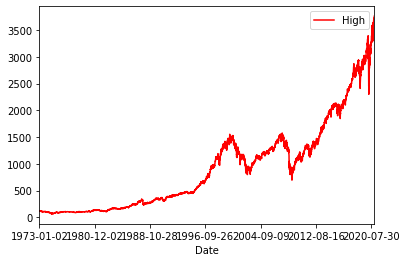

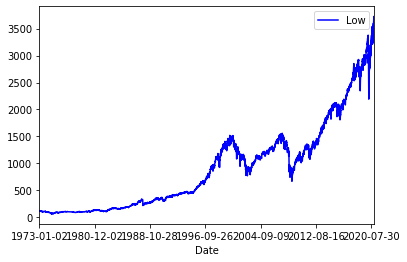

In [63]:
df = average_all()
stock_market = get_data('GSPC')

print('Average of all')
#print(t_test(df, stock_market))
print()

tickers = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA', 'GSPC']
multiple_t_test(tickers)

for i in tickers:
    print(i)
    df = get_data(i)
    get_graph(df)
